# **Overview**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure the speed of processing. Your goal is to understand what factors make a car more or less expensive. As a result of your analysis, you should provide clear recommendations to your client—a used car dealership—as to what consumers value in a used car.

In [9]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np

In [10]:
vehicles_df = pd.read_csv('vehicles.csv')

In [15]:
vehicles_df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [16]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
 14  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 48.9+ MB


In [17]:
#Drop columns that aren't relevant to the ask.

#TODO: Possibly drop region and size?

vehicles_df.drop(columns = ['id', 'VIN', 'size'], inplace = True)

KeyError: "['id', 'VIN', 'size'] not found in axis"

In [18]:
null_counts = vehicles_df.isnull().sum()
total_rows = len(vehicles_df)
null_percentages = (null_counts / total_rows) * 100
print(null_percentages)

region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64


In [19]:
vehicles_df['cylinders'].value_counts(dropna = False)

,count
cylinders,
NaN,177678
6 cylinders,94169
4 cylinders,77642
8 cylinders,72062
5 cylinders,1712
10 cylinders,1455
other,1298
3 cylinders,655
12 cylinders,209


In [20]:
vehicles_df['cylinders'].value_counts(dropna=False)

,count
cylinders,
NaN,177678
6 cylinders,94169
4 cylinders,77642
8 cylinders,72062
5 cylinders,1712
10 cylinders,1455
other,1298
3 cylinders,655
12 cylinders,209


In [21]:
vehicles_df['cylinders'].fillna('6 cylinders', inplace=True)
vehicles_df['cylinders'].value_counts(dropna=False)

<ipython-input-21-46204a259c45>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vehicles_df['cylinders'].fillna('6 cylinders', inplace=True)


,count
cylinders,
6 cylinders,271847
4 cylinders,77642
8 cylinders,72062
5 cylinders,1712
10 cylinders,1455
other,1298
3 cylinders,655
12 cylinders,209


In [22]:
#Time to handle the 'Condition' column missing data.
vehicles_df['condition'].value_counts(dropna=False)

,count
condition,
NaN,174104
good,121456
excellent,101467
like new,21178
fair,6769
new,1305
salvage,601


In [23]:
#Fill with most common categorical value, similar to how we handled the cylinder column.
vehicles_df['condition'] = vehicles_df['condition'].fillna('good')

In [24]:
#Now handle Drive Column.
vehicles_df['drive'].value_counts(dropna=False)

,count
drive,
4wd,131904
NaN,130567
fwd,105517
rwd,58892


In [25]:
#4wd is the most common value. Replace NaN values with 4wd.
vehicles_df['drive'].fillna('4wd', inplace=True)

<ipython-input-25-6c1cc313b03d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vehicles_df['drive'].fillna('4wd', inplace=True)


In [26]:
#Time to handle the 'type' column missing data.
vehicles_df['type'].value_counts(dropna=False)

,count
type,
NaN,92858
sedan,87056
SUV,77284
pickup,43510
truck,35279
other,22110
coupe,19204
hatchback,16598
wagon,10751


In [27]:
vehicles_df['type'].fillna('sedan', inplace=True)

<ipython-input-27-286a349470d4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vehicles_df['type'].fillna('sedan', inplace=True)


In [28]:
#Time to handle the 'paint_color' column missing data.
vehicles_df['paint_color'].value_counts(dropna=False)

,count
paint_color,
NaN,130203
white,79285
black,62861
silver,42970
blue,31223
red,30473
grey,24416
green,7343
custom,6700


In [29]:
vehicles_df['paint_color'].fillna('white',inplace=True)

<ipython-input-29-052f8a224623>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vehicles_df['paint_color'].fillna('white',inplace=True)


In [30]:
null_counts = vehicles_df.isnull().sum()
total_rows = len(vehicles_df)
null_percentages = (null_counts / total_rows) * 100

# Print the result
print(null_percentages)

region          0.000000
price           0.000000
year            0.282281
manufacturer    4.133714
model           1.236179
condition       0.000000
cylinders       0.000000
fuel            0.705819
odometer        1.030735
title_status    1.930753
transmission    0.598763
drive           0.000000
type            0.000000
paint_color     0.000000
state           0.000000
dtype: float64


In [31]:
vehicles_df = vehicles_df.dropna()
vehicles_df.duplicated().sum()

np.int64(50668)

In [32]:
#50668 duplicates found in dataset. Drop these.
vehicles_df = vehicles_df.drop_duplicates()
vehicles_df.duplicated().sum()

np.int64(0)

In [33]:
null_counts = vehicles_df.isnull().sum()
total_rows = len(vehicles_df)
null_percentages = (null_counts / total_rows) * 100

# Print the result
print(null_percentages)

region          0.0
price           0.0
year            0.0
manufacturer    0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
state           0.0
dtype: float64


<Axes: xlabel='price'>

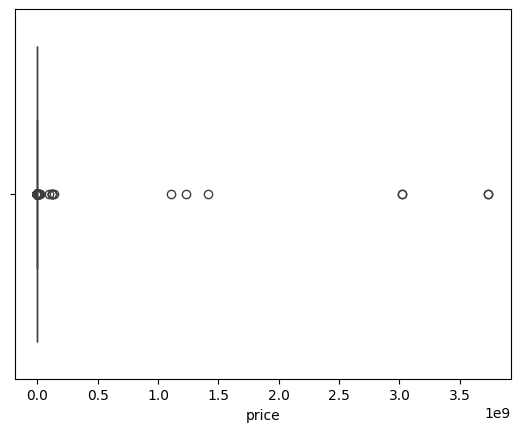

In [34]:
#NaNs and duplciates have been removed. Data has been cleaned.
vehicles_df.head()
vehicles_df.nunique()
vehicles_df.dtypes
sns.boxplot(vehicles_df, x="price")

In [35]:
# Calculate Q1, Q3, and IQR for the 'price' column
Q1 = vehicles_df['price'].quantile(0.25)
Q3 = vehicles_df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
vehicles_df_no_outliers = vehicles_df[
    (vehicles_df['price'] >= lower_bound) & (vehicles_df['price'] <= upper_bound)
]

# Print the number of rows before and after outlier removal
print(f"Number of rows before outlier removal: {len(vehicles_df)}")
print(f"Number of rows after outlier removal: {len(vehicles_df_no_outliers)}")

Number of rows before outlier removal: 338936
Number of rows after outlier removal: 333376


<Axes: xlabel='price'>

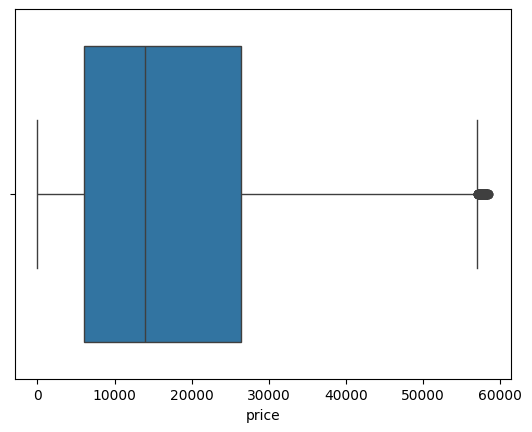

In [36]:
vehicles_df = vehicles_df_no_outliers
sns.boxplot(vehicles_df, x="price")

<Axes: xlabel='price', ylabel='Count'>

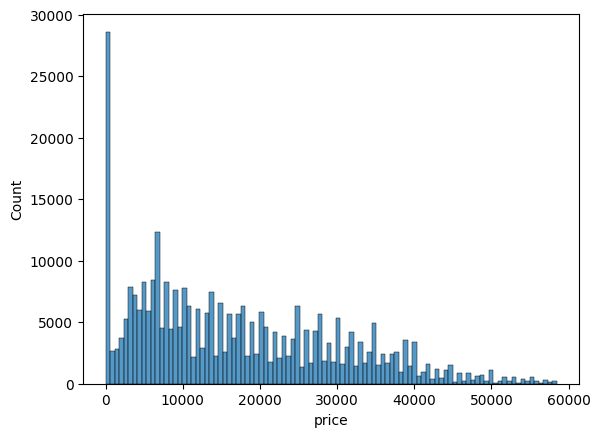

In [37]:
sns.histplot(vehicles_df, x="price")

<Axes: xlabel='price', ylabel='Count'>

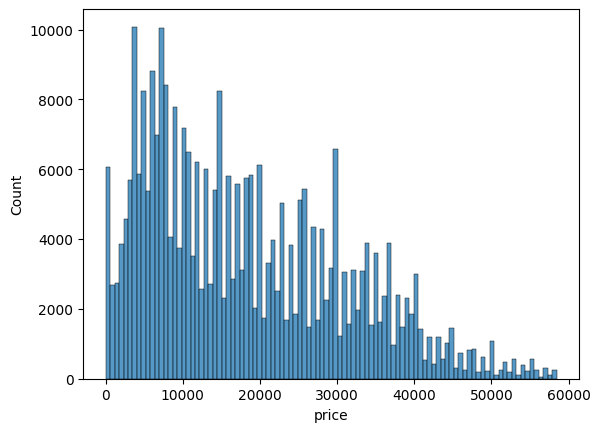

In [38]:
#Cars with a price of 0 would not be useful information to used car dealerships. We can remove those
vehicles_df = vehicles_df[vehicles_df['price'] > 0]
sns.histplot(vehicles_df, x="price")

<Axes: xlabel='price', ylabel='Count'>

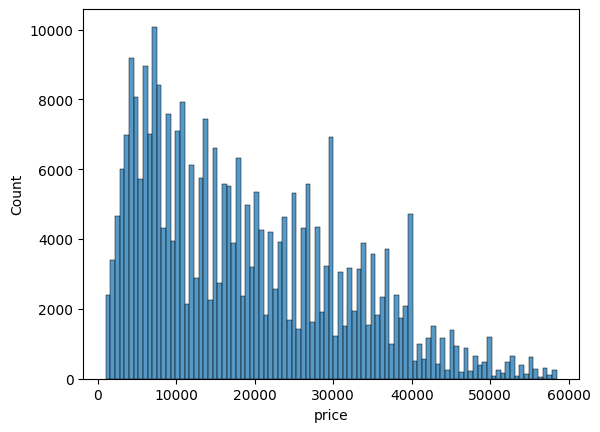

In [39]:
#Still have a large amount of cars < $1000. Going to remove those to focus on larger amounts.
vehicles_df = vehicles_df[vehicles_df['price'] > 1000]
sns.histplot(vehicles_df, x="price")

In [40]:
#Now that price is looking better, lets look at the other numerical feature: 'odometer'
vehicles_df['odometer'].describe()

,odometer
count,3.022620e+05
mean,9.626536e+04
std,1.689727e+05
min,0.000000e+00
25%,3.708050e+04
50%,8.645350e+04
75%,1.360000e+05
max,1.000000e+07


<Axes: xlabel='odometer', ylabel='Count'>

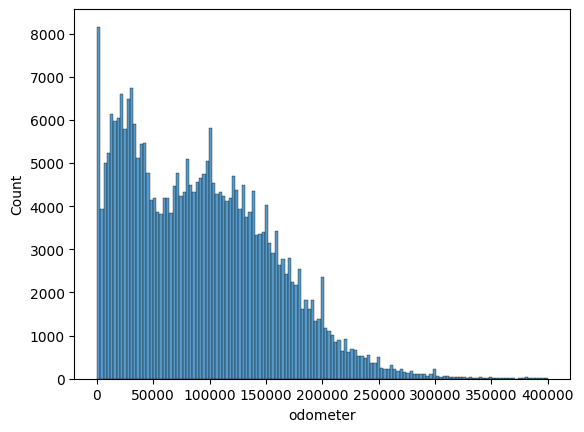

In [41]:
#Some models of cars can exceed 300,000 miles.
#Cars usually do not exceed 400,000 miles. Lets use that as our threshold.
vehicles_df = vehicles_df[vehicles_df['odometer'] < 400000]
sns.histplot(vehicles_df, x="odometer")

In [42]:
#The model column likely needs some cleanup.
#Let's see how many unique valuesare present in the data.
vehicles_df['model'].value_counts()

,count
model,
f-150,5493
silverado 1500,3543
1500,2902
camry,2199
accord,2183
...,...
"f150, platinum",1
"f150, xlt",1
taurus wagon lx,1


In [43]:
#With many columns being one-off unique values.
#Lets define a threshold and lump everything into an 'other' column.
#Lets try a threshold of 200 and see how many values are remaining.
threshold = 200
value_counts = vehicles_df['model'].value_counts()
to_replace = value_counts[value_counts <= threshold].index
vehicles_df['model'] = vehicles_df['model'].replace(to_replace, 'other')

In [44]:
vehicles_df['model'].value_counts()
#We are now down to 254 unique models. This is more manageable.

,count
model,
other,155470
f-150,5493
silverado 1500,3543
1500,2902
camry,2199
...,...
outlander,205
grand cherokee limited,205
grand marquis,204


In [45]:
vehicles_df['manufacturer'].value_counts()

,count
manufacturer,
ford,51203
chevrolet,39952
toyota,25674
honda,16118
nissan,13736
jeep,13702
gmc,11992
ram,11928
bmw,11337


In [46]:
vehicles_df['type'].value_counts()

,count
type,
sedan,125065
SUV,54225
pickup,33391
truck,21721
other,16147
coupe,14264
hatchback,12847
wagon,7878
van,5970


In [47]:
vehicles_df['drive'].value_counts()

,count
drive,
4wd,180635
fwd,77621
rwd,43333


In [48]:
vehicles_df['transmission'].value_counts()

,count
transmission,
automatic,227780
other,56988
manual,16821


In [49]:
vehicles_df['state'].value_counts()

,count
state,
ca,33353
fl,19913
tx,16769
ny,14620
mi,13132
oh,12635
pa,10255
nc,9954
or,9303


In [50]:
vehicles_df['paint_color'].value_counts()

,count
paint_color,
white,137571
black,47529
silver,32670
blue,23763
red,23106
grey,18135
green,5428
brown,5136
custom,4910


In [51]:
vehicles_df['fuel'].value_counts()

,count
fuel,
gas,256698
other,23534
diesel,15894
hybrid,4141
electric,1322


In [52]:
import matplotlib.pyplot as plt

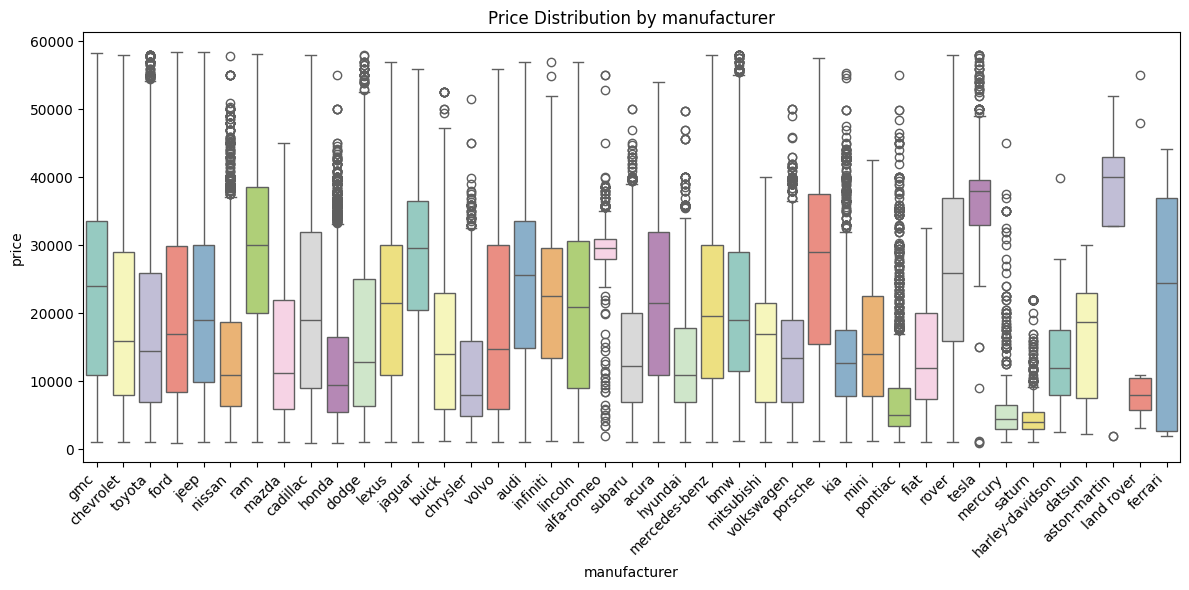

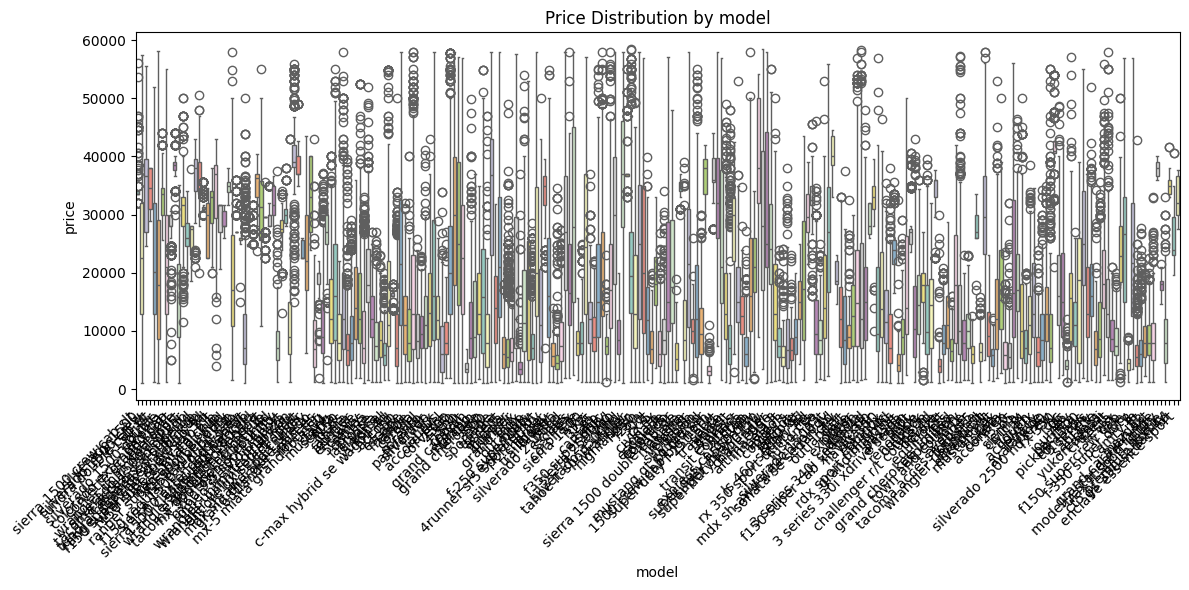

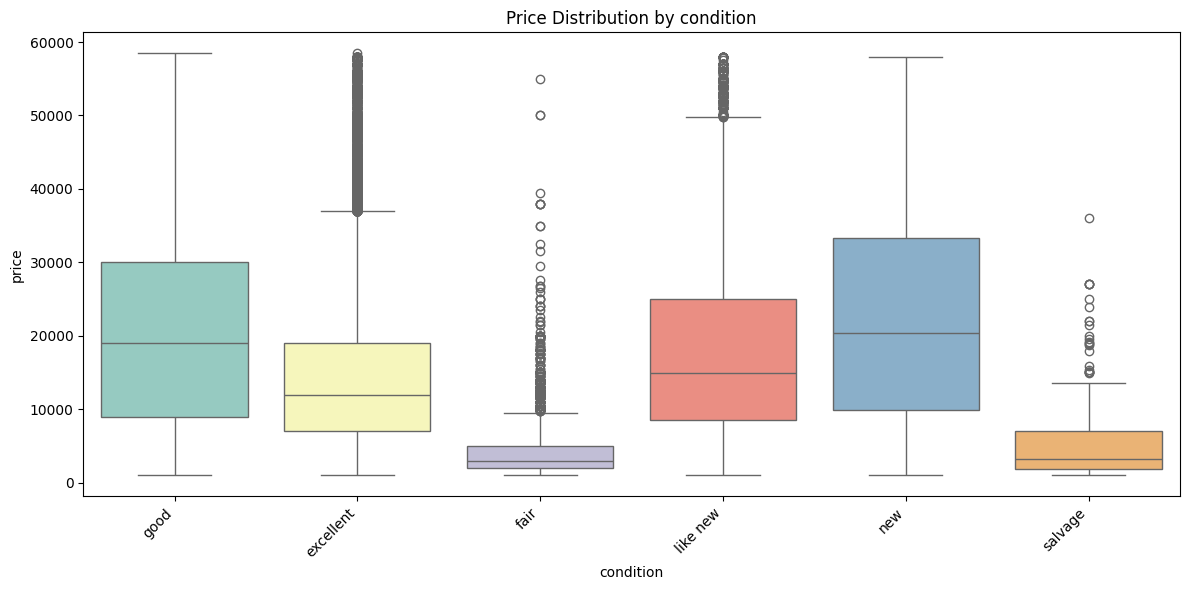

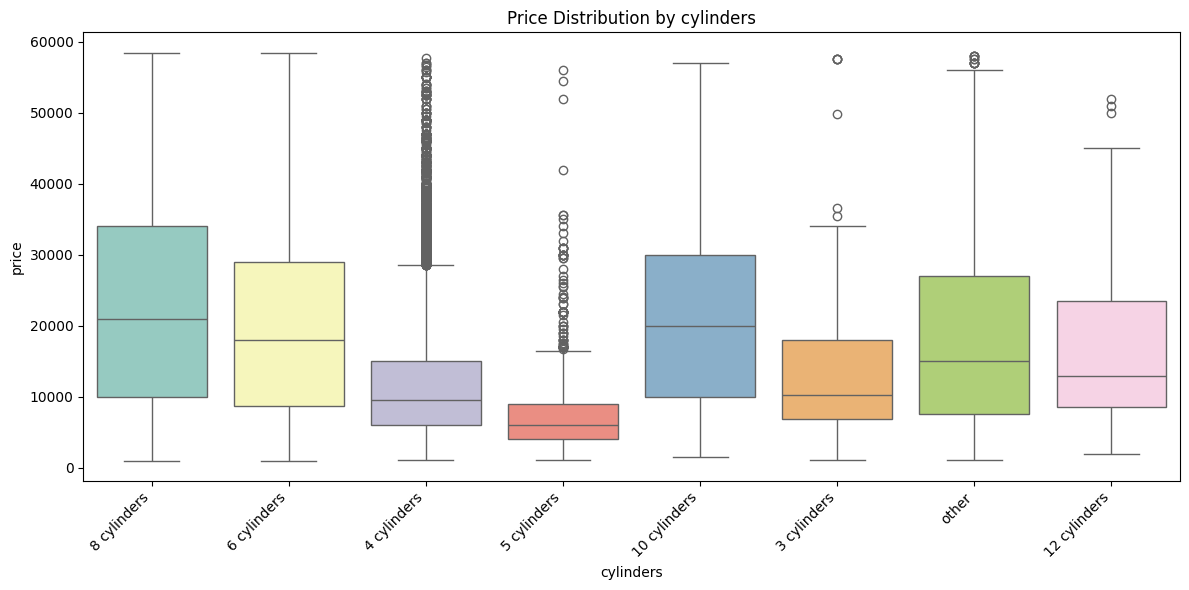

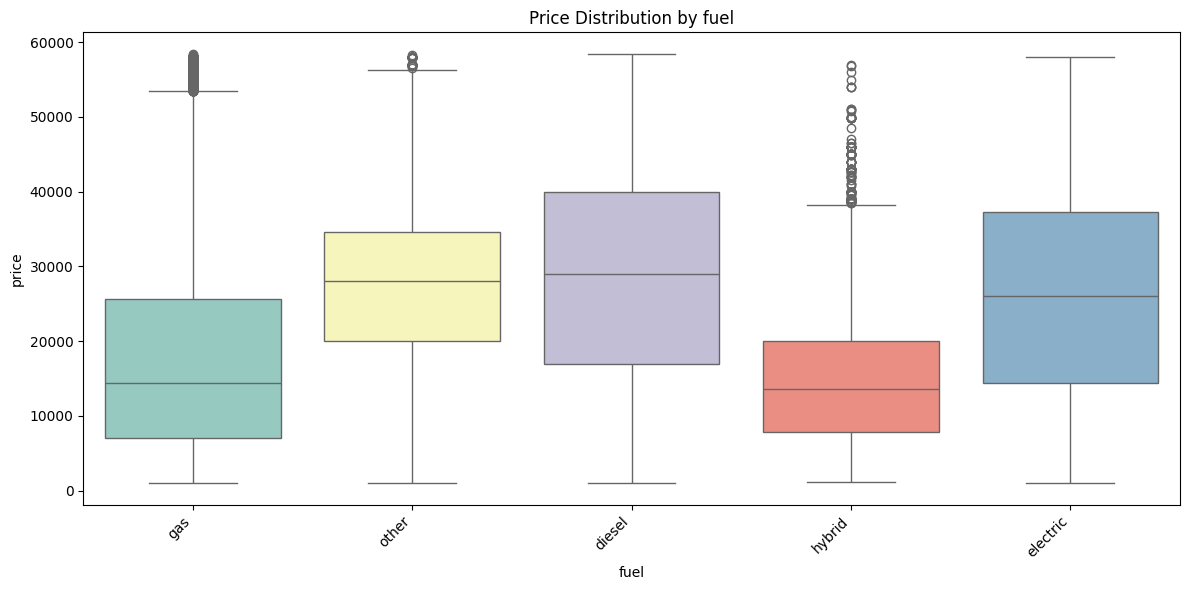

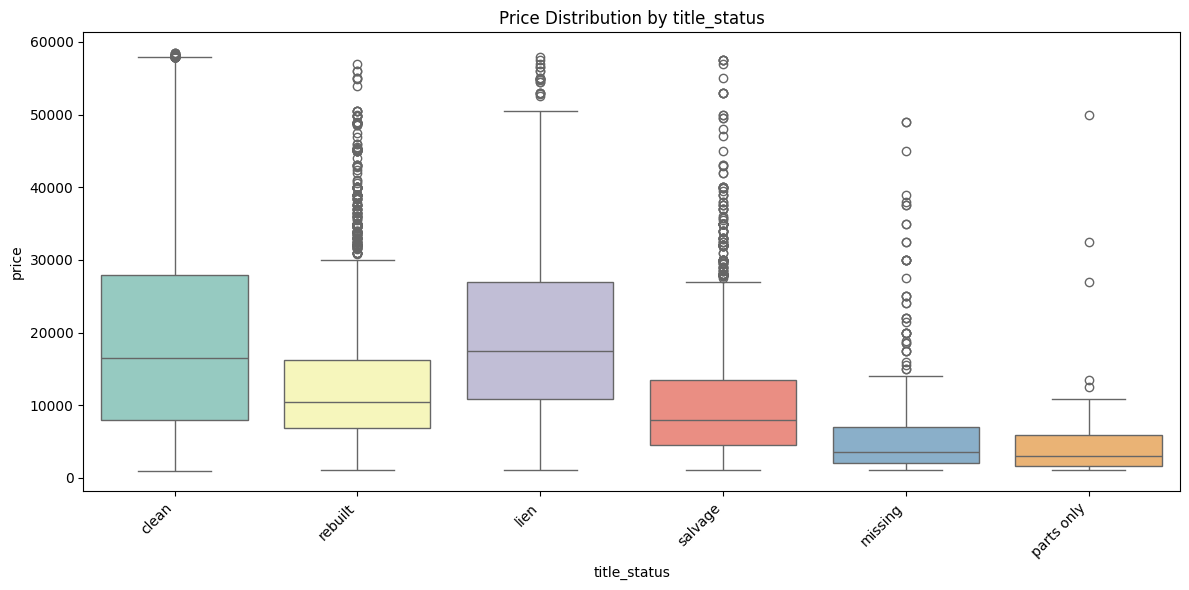

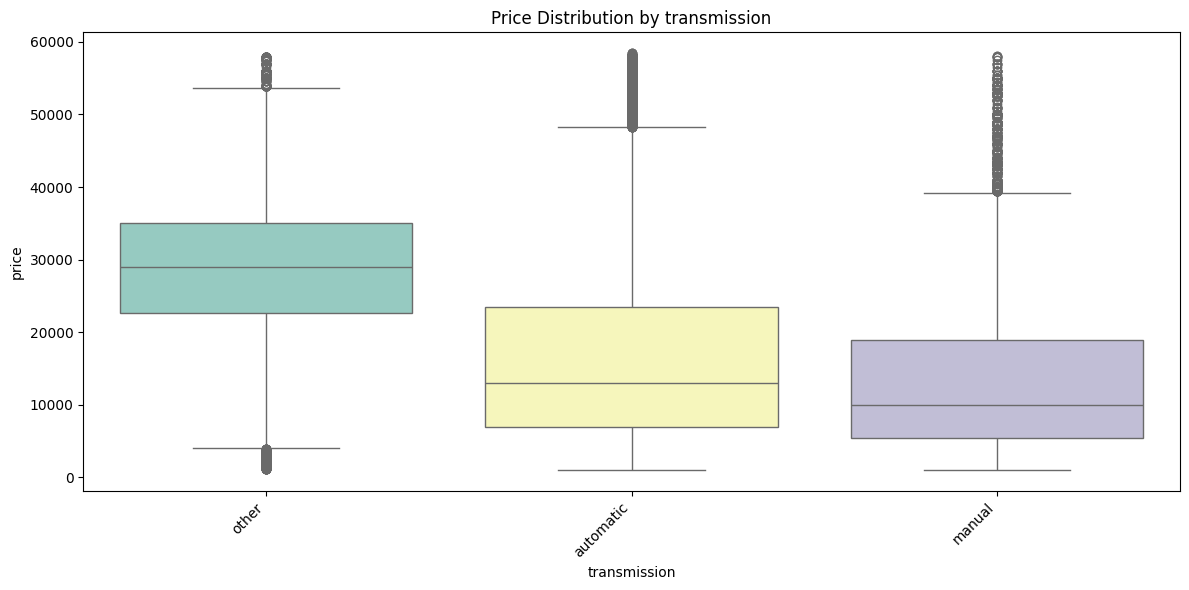

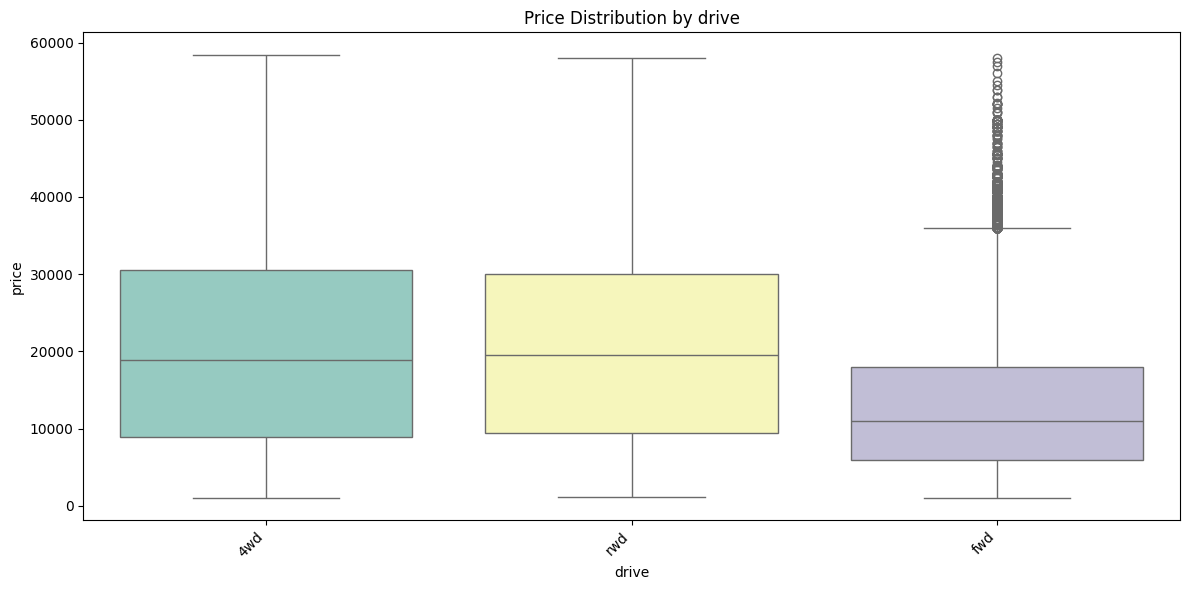

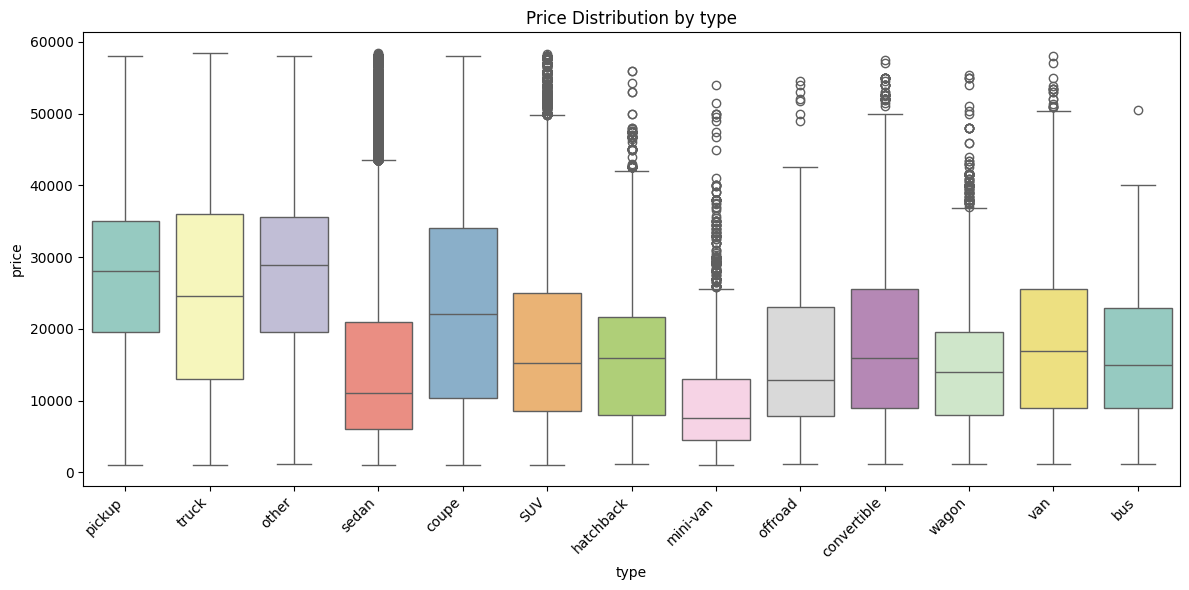

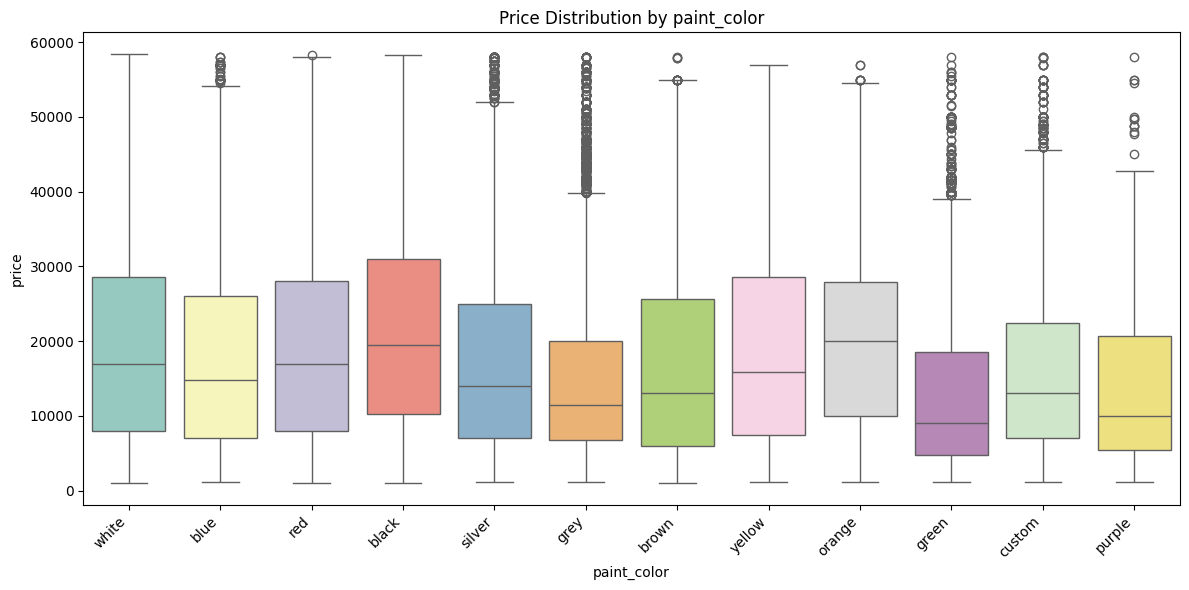

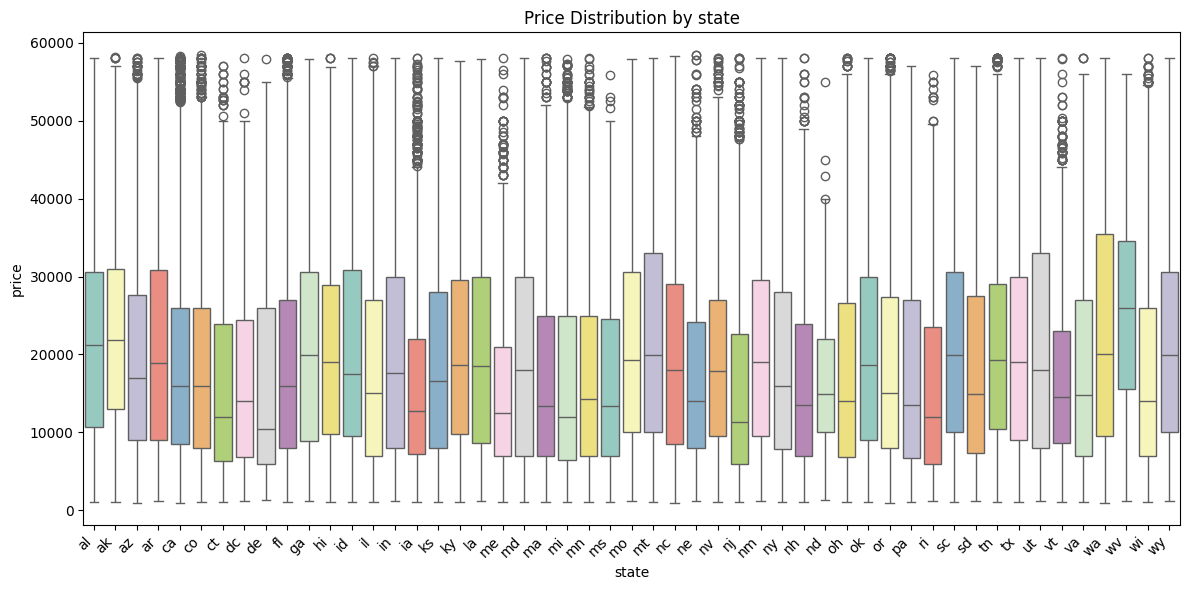

In [53]:
# Iterate through categorical columns and create boxplots
categorical_cols = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']

for col in categorical_cols:
    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    sns.boxplot(x=col, y='price', data=vehicles_df, hue=col, palette='Set3')
    plt.title(f'Price Distribution by {col}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout() # Prevents labels from overlapping
    plt.show()


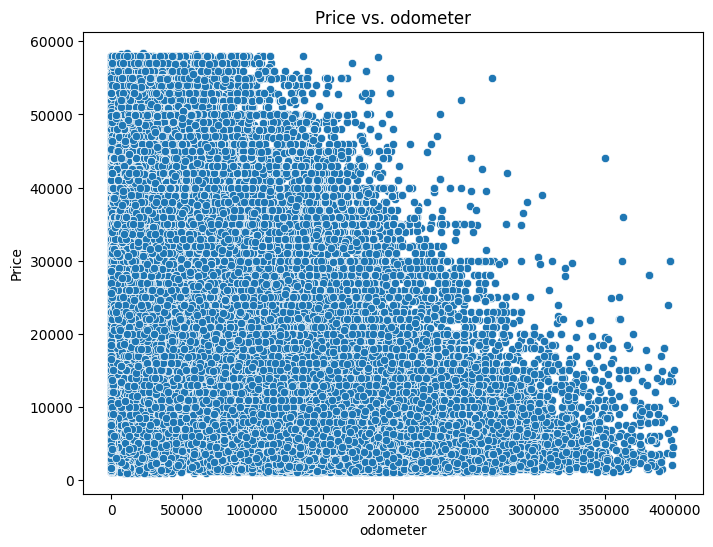

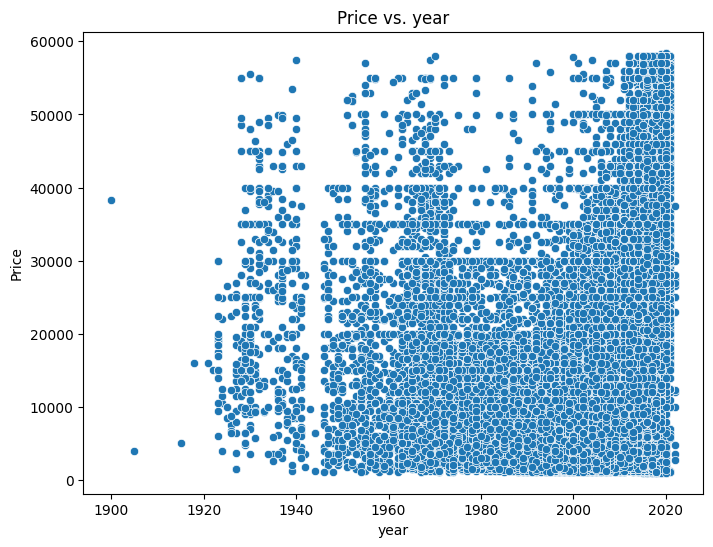

In [54]:
# Iterate through numerical columns and create scatterplots
numerical_cols = ['odometer', 'year']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='price', data=vehicles_df)
    plt.title(f'Price vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()


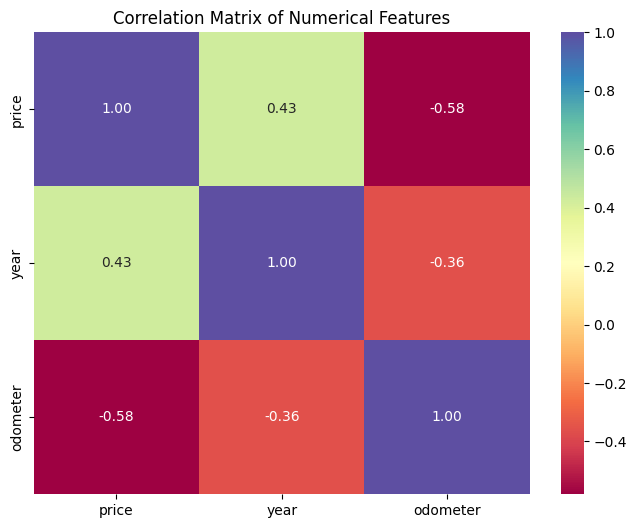

In [56]:
# Create a correlation matrix for numerical features
correlation_matrix = vehicles_df[['price', 'year', 'odometer']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [57]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

In [58]:
# Define features (X) and target (y)
X = vehicles_df.drop('price', axis=1)
y = vehicles_df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60318 entries, 216770 to 92376
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        60318 non-null  object 
 1   year          60318 non-null  float64
 2   manufacturer  60318 non-null  object 
 3   model         60318 non-null  object 
 4   condition     60318 non-null  object 
 5   cylinders     60318 non-null  object 
 6   fuel          60318 non-null  object 
 7   odometer      60318 non-null  float64
 8   title_status  60318 non-null  object 
 9   transmission  60318 non-null  object 
 10  drive         60318 non-null  object 
 11  type          60318 non-null  object 
 12  paint_color   60318 non-null  object 
 13  state         60318 non-null  object 
dtypes: float64(2), object(12)
memory usage: 6.9+ MB


In [59]:
categorical_features = ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
numerical_features = ['year', 'odometer']
print ( categorical_features, numerical_features)


['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color'] ['year', 'odometer']


In [61]:
# Create the preprocessor
preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_features), # handle_unknown='ignore' added
    (StandardScaler(), numerical_features)
)

# Create the pipeline
linear_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'model__fit_intercept': [True, False]
}


In [62]:
grid_search = GridSearchCV(linear_pipe, param_grid = param_grid, cv = 5).fit(X_train, y_train)

In [63]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters:", best_params)
print("Best R-squared score (on training data):", best_score)

Best parameters: {'model__fit_intercept': True}
Best R-squared score (on training data): 0.6552468257052956


Mean Squared Error: 55044419.75738919
Root Mean Squared Error: 7419.192662102069


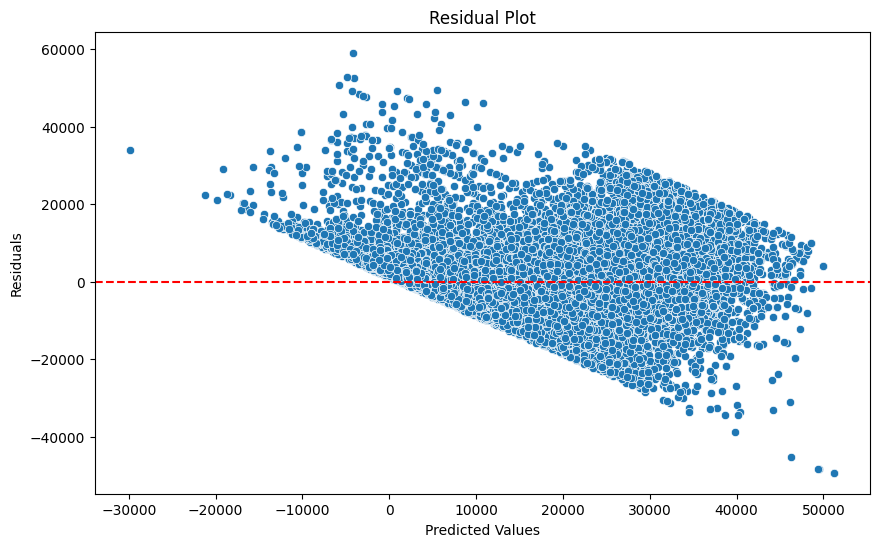

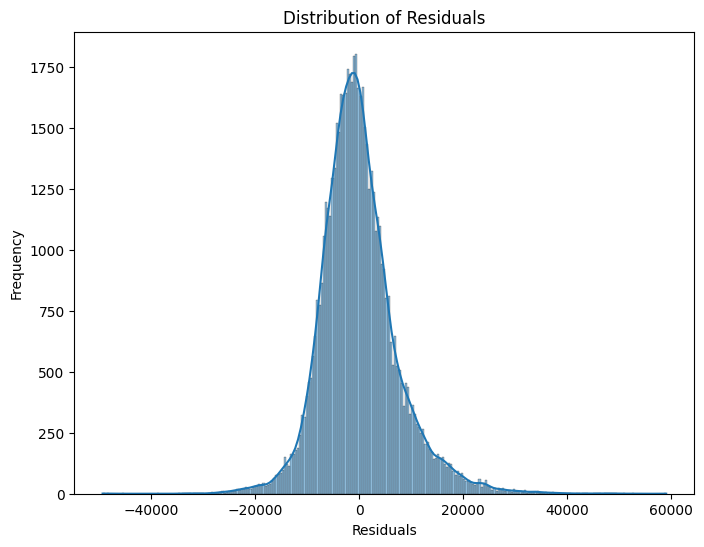

In [64]:
# Fit the best model on the entire training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = best_model.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Analyze the residuals
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Create a histogram of the residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


In [65]:
#Now we will see which features most largely affects the price of a car.
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(
    best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# Get feature importances
importance_scores = result.importances_mean

# Create a DataFrame to display the results
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': importance_scores
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
importance_df


,Feature,Importance
7,odometer,0.485608
1,year,0.146147
6,fuel,0.091381
2,manufacturer,0.060356
11,type,0.056823
5,cylinders,0.032956
10,drive,0.032051
8,title_status,0.008893
4,condition,0.004726
9,transmission,0.004062


# **This shows us that the largest factors that affect price are Odometer, and Year.**